In [1]:
# 1. 필요한 라이브러리 설치
!pip install mlxtend --quiet

# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [3]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 폰트 설정
font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

           계란    기저귀     맥주    버터     빵    우유
count       9      9      9     9     9     9
unique      2      2      2     2     2     2
top     False  False  False  True  True  True
freq        6      5      6     6     7     5
빈발 항목집합:
     support     itemsets
0   0.333333         (계란)
1   0.444444        (기저귀)
2   0.333333         (맥주)
3   0.666667         (버터)
4   0.777778          (빵)
5   0.555556         (우유)
6   0.333333     (빵, 기저귀)
7   0.333333    (우유, 기저귀)
8   0.666667      (빵, 버터)
9   0.333333     (우유, 버터)
10  0.444444      (빵, 우유)
11  0.333333  (빵, 우유, 버터)

연관 규칙:
   antecedents consequents   support  confidence      lift
0          (빵)       (기저귀)  0.333333    0.428571  0.964286
1        (기저귀)         (빵)  0.333333    0.750000  0.964286
2         (우유)       (기저귀)  0.333333    0.600000  1.350000
3        (기저귀)        (우유)  0.333333    0.750000  1.350000
4          (빵)        (버터)  0.666667    0.857143  1.285714
5         (버터)         (빵)  0.666667    1.000000  1.285714
6 

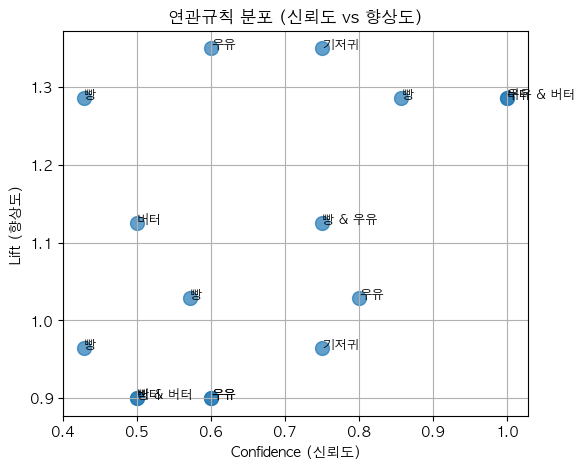

In [ ]:


# 2. 샘플 장바구니 데이터 (list of lists)
dataset = [
    ['우유', '빵', '버터'],
    ['우유', '기저귀', '맥주', '계란'],
    ['빵', '버터'],
    ['우유', '빵', '기저귀', '맥주'],
    ['빵', '버터', '기저귀'],
    ['우유', '빵', '버터', '기저귀'],
    ['맥주', '계란'],
    ['우유', '빵', '버터'],
    ['빵', '버터', '계란']
]

# 3. 트랜잭션 인코딩 (1-hot)
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df.describe())
# 4. Apriori로 빈발항목집합(frequent itemsets) 추출
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("빈발 항목집합:")
print(frequent_itemsets)

# 5. 연관 규칙 추출 (신뢰도 0.7 이상)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("\n연관 규칙:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# 6. 연관규칙 결과를 보기 쉽게
for idx, rule in rules.iterrows():
    ante = ', '.join(list(rule['antecedents']))
    cons = ', '.join(list(rule['consequents']))
    print(f"- 만약 [{ante}]를(을) 산다면 → [{cons}]를(을) 함께 살 확률(신뢰도): {rule['confidence']:.2f}, 지지도: {rule['support']:.2f}, 향상도: {rule['lift']:.2f}")

# 7. 시각화 (Lift vs Confidence)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(rules['confidence'], rules['lift'], s=100, alpha=0.7)
plt.xlabel('Confidence (신뢰도)')
plt.ylabel('Lift (향상도)')
plt.title('연관규칙 분포 (신뢰도 vs 향상도)')
for i, row in rules.iterrows():
    plt.text(row['confidence'], row['lift'], ' & '.join(row['antecedents']), fontsize=9)
plt.grid(True)
plt.show()
